Лабораторная работа №4

**Исследование кривых обучения и регуляризации**

Для выполнения данной работы мы будем использовать набор данных (датасет) с ценами на недвижимость в Бостоне. Датасет прилагается к заданию как в виде отдельного файла, так и может быть загружена непосредственно из scikit-learn.
В этом наборе имеется 506 выборок и 13 переменных характеристик. Цель состоит в том, чтобы спрогнозировать стоимость дома с использованием заданных характеристик.</br>
**Информация об атрибутах (по порядку)**:

- Уровень преступности на душу населения по городам
- ЗН доля земли под жилую застройку зонирована на участки площадью более 25 000 кв. Футов.
- INDUS доля акров, не относящихся к розничной торговле, на город
- CHAS Фиктивная переменная реки Чарльз (= 1, если участок ограничивает реку; 0 в противном случае)
- Концентрация оксидов азота NOX (частей на 10 миллионов)
- RM среднее количество комнат в доме
- ВОЗРАСТ Доля домов, построенных до 1940 года, занимаемых владельцами
- DIS взвесила расстояния до пяти бостонских центров занятости
- Индекс доступности радиальных автомобильных дорог РАД
- НАЛОГ Полная ставка налога на имущество за 10 000 долларов США
- PTRATIO соотношение учеников и учителей по городам
- B 1000 (Bk — 0,63) ^ 2, где Bk — доля чернокожего населения по городам.
- LSTAT% более низкий статус населения
- MEDV Средняя стоимость частных домов в 1000 долларов


In [174]:
import pandas as pd

df = pd.read_csv('boston_house_prices.csv')
# set headers
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# delete first row with headers
df = df.drop(df.index[0])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


**Задание к лабораторной работе.**

1. Построить и отрисовать кривые обучения для любых 2х моделей - регрессорах.

Сделать вывод – какая из моделей более подходит для предложенного датасета,

Проанализировать наличие недо- или пере- обученности, выдвинуть предложение о значении целевого показателя выбранной метрики.

Отрисовать целевое значение на построенном графике кривых обучения.

Для одной из моделей отрисовать кривую обучения относительно ошибки.


In [175]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import LabelEncoder

# Преобразуем целевую переменную в числовой формат
le = LabelEncoder()
df['MEDV'] = le.fit_transform(df['MEDV'])

for column in df.columns:
    if df[column].dtype == np.dtype('O'):
        df[column] = le.fit_transform(df[column])



# Разобьем датасет на признаки и целевую переменную
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Разобьем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Создадим модель линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Создадим модель k ближайших соседей
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Посчитаем среднеквадратичную ошибку для линейной регрессии
from sklearn.metrics import mean_squared_error
print(f'Среднеквадратичная ошибка для линейной регрессии: {mean_squared_error(y_test, y_pred):.3f}')

# Посчитаем среднеквадратичную ошибку для k ближайших соседей
print(f'Среднеквадратичная ошибка для k ближайших соседей: {mean_squared_error(y_test, y_pred_knn):.3f}')



Среднеквадратичная ошибка для линейной регрессии: 2243.573
Среднеквадратичная ошибка для k ближайших соседей: 2183.393


Построим кривые обучения для линейной регрессии


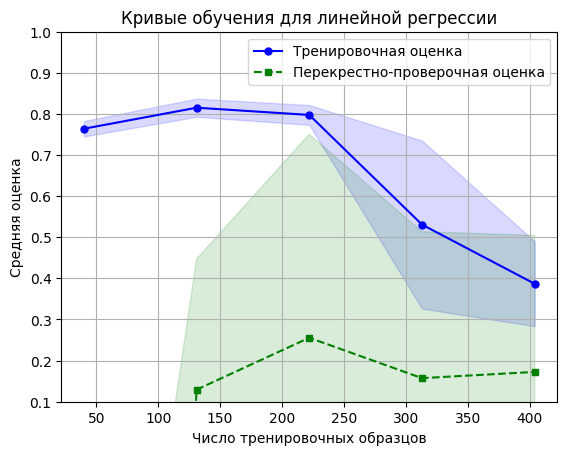

In [176]:
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, cv=5)
# Вычислим средние значения и стандартное отклонение для тренировочных и тестовых данных
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Построим график
plt.plot(train_sizes, train_mean, color='blue', marker='o',
         markersize=5, label='Тренировочная оценка')
plt.fill_between(train_sizes, train_mean + train_std,
                 train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',
         markersize=5, label='Перекрестно-проверочная оценка')
plt.fill_between(train_sizes, test_mean + test_std,
                 test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Число тренировочных образцов')
plt.ylabel('Средняя оценка')
plt.legend(loc='upper right')
plt.title('Кривые обучения для линейной регрессии')
plt.ylim([0.1, 1.0])
plt.show()

Построим кривые обучения для k ближайших соседей


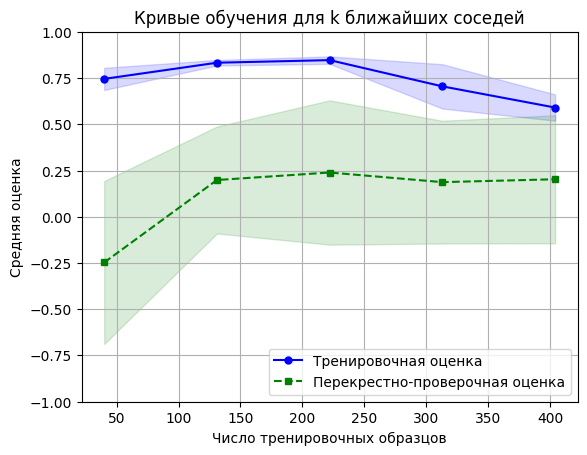

In [177]:

train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5)
# Вычислим средние значения и стандартное отклонение для тренировочных и тестовых данных
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Построим график
plt.plot(train_sizes, train_mean, color='blue', marker='o',
         markersize=5, label='Тренировочная оценка')
plt.fill_between(train_sizes, train_mean + train_std,
                 train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',
         markersize=5, label='Перекрестно-проверочная оценка')
plt.fill_between(train_sizes, test_mean + test_std,
                 test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Число тренировочных образцов')
plt.ylabel('Средняя оценка')
plt.legend(loc='lower right')
plt.title('Кривые обучения для k ближайших соседей')
plt.ylim([-1.0, 1.0])
plt.show()

Для одной из моделей отрисовать кривую обучения относительно ошибки.


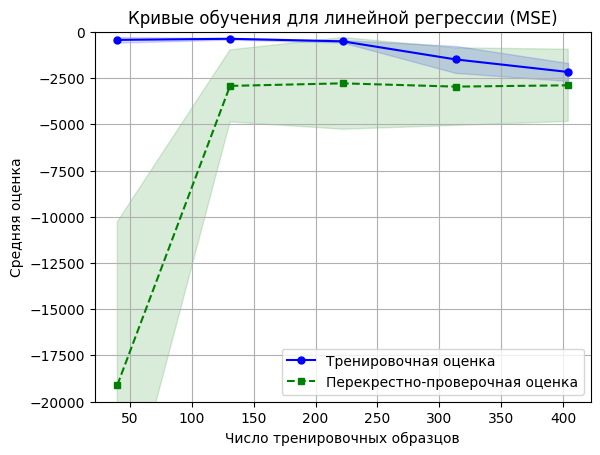

In [178]:
# Построим кривые обучения для линейной регрессии
train_sizes, train_scores, test_scores = learning_curve(
    lr, X, y, cv=5, scoring='neg_mean_squared_error')
# Вычислим средние значения и стандартное отклонение для тренировочных и тестовых данных
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Построим график
plt.plot(train_sizes, train_mean, color='blue', marker='o',
         markersize=5, label='Тренировочная оценка')
plt.fill_between(train_sizes, train_mean + train_std,
                 train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',
         markersize=5, label='Перекрестно-проверочная оценка')
plt.fill_between(train_sizes, test_mean + test_std,
                 test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Число тренировочных образцов')
plt.ylabel('Средняя оценка')
plt.legend(loc='lower right')
plt.title(
    'Кривые обучения для линейной регрессии (MSE)')
plt.ylim([-20000, 0])
plt.show()

2. Последовательно выполнить обучение моделей линейной регрессии, гребневой регуляризации (Ridge) и Lasso регуляризации.

Сравнить модели используя несколько метрик.
Свести значения весовых коэффициентов в единую таблицу, сделать выводы
о коллинеарности данных и о важности имеющихся признаков


In [179]:
from tabulate import tabulate
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Обучим модель Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Посчитаем среднеквадратичную ошибку для Ridge
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Обучим модель Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Посчитаем среднеквадратичную ошибку для Lasso
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

# Посчитаем коэффициент детерминации для Ridge
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Посчитаем коэффициент детерминации для Lasso
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Посчитаем среднюю абсолютную ошибку для Ridge
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

# Посчитаем среднюю абсолютную ошибку для Lasso
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)

# Сведем значения весовых коэффициентов в единую таблицу

table = tabulate([['Ridge', ridge_mse, ridge_r2, ridge_mae],
                  ['Lasso', lasso_mse, lasso_r2, lasso_mae]],
                 headers=['Модель', 'MSE', 'R2', 'MAE'],
                 tablefmt='orgtbl')

print(table, end='\n\n')
print('Вывод: Коэффициент детерминации для Ridge больше, чем для Lasso,\nа MSE меньше, что говорит о том, что модель Ridge лучше предсказывает целевую переменную.')

| Модель   |     MSE |       R2 |     MAE |
|----------+---------+----------+---------|
| Ridge    | 2243.84 | 0.284259 | 33.0214 |
| Lasso    | 2258.75 | 0.279504 | 32.9439 |

Вывод: Коэффициент детерминации для Ridge больше, чем для Lasso,
а MSE меньше, что говорит о том, что модель Ridge лучше предсказывает целевую переменную.


3. Опциональное задание.

Попытаться реализовать ElasticNet модель. Сравнить с результатами полученными в п.2.


In [180]:
# Попытаться реализовать ElasticNet модель. Сравнить с результатами полученными в п.2.

from sklearn.linear_model import ElasticNet

# Обучим модель ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

# Посчитаем среднеквадратичную ошибку для ElasticNet
elastic_mse = mean_squared_error(y_test, y_pred_elastic)

# Посчитаем коэффициент детерминации для ElasticNet
elastic_r2 = r2_score(y_test, y_pred_elastic)

# Посчитаем среднюю абсолютную ошибку для ElasticNet
elastic_mae = mean_absolute_error(y_test, y_pred_elastic)

# Сведем значения весовых коэффициентов в единую таблицу
table = tabulate([['Ridge', ridge_mse, ridge_r2, ridge_mae],
                  ['Lasso', lasso_mse, lasso_r2, lasso_mae],
                  ['ElasticNet', elastic_mse, elastic_r2, elastic_mae]],
                 headers=['Модель', 'MSE', 'R2', 'MAE'],
                 tablefmt='orgtbl')

print(table, end='\n\n')

| Модель     |     MSE |       R2 |     MAE |
|------------+---------+----------+---------|
| Ridge      | 2243.84 | 0.284259 | 33.0214 |
| Lasso      | 2258.75 | 0.279504 | 32.9439 |
| ElasticNet | 2259.65 | 0.279217 | 32.977  |

